In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:/Users/Saily/OneDrive/Documents/assignment Ds1/Data Science Assignment/delivery_time (2).csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

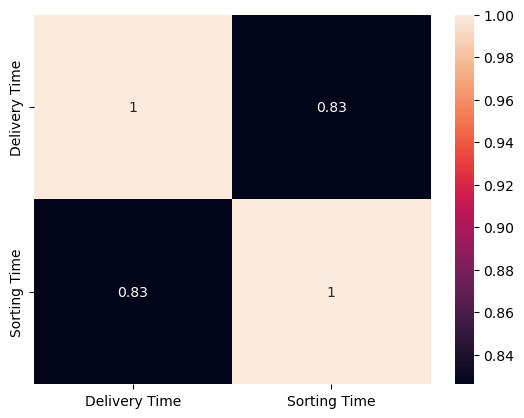

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1,inplace=True)

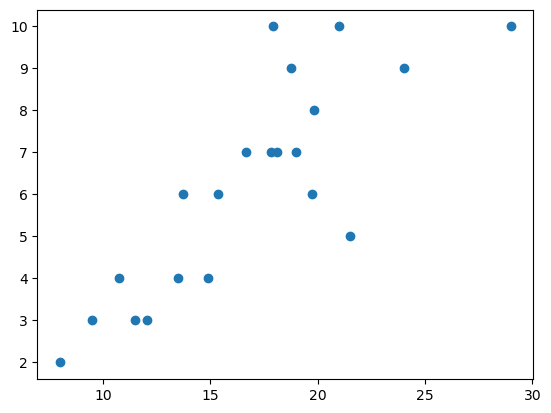

In [8]:
plt.scatter(df['Delivery_Time'],df['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

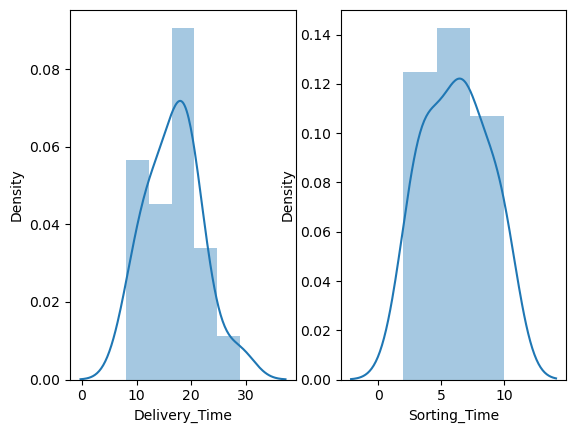

In [9]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])
plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

In [14]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        16:55:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
new=pd.DataFrame({
    'Sorting_Time':[8,4,12,1,9,13,0]
})

In [17]:
model.predict(new)

0    19.774893
1    13.178814
2    26.370973
3     8.231754
4    21.423913
5    28.019993
6     6.582734
dtype: float64

In [18]:
new['pred_delivary_time']=model.predict(new)
new

,Sorting_Time,pred_delivary_time
0,8,19.774893
1,4,13.178814
2,12,26.370973
3,1,8.231754
4,9,21.423913
5,13,28.019993
6,0,6.582734


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

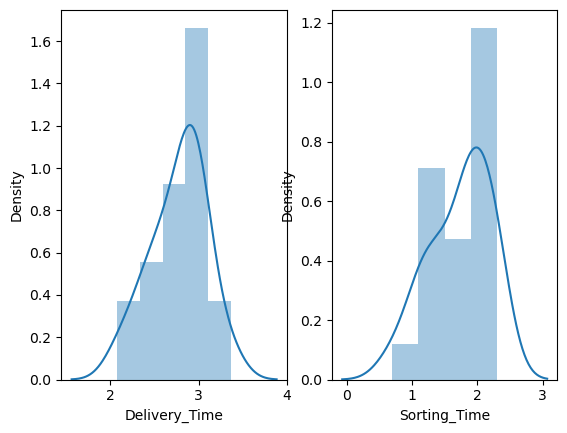

In [19]:
plt.subplot(1,2,1)
sns.distplot(np.log(df['Delivery_Time']))
plt.subplot(1,2,2)
sns.distplot(np.log(df['Sorting_Time']))

In [20]:
model=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=df).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 02 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                           16:56:57   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""